## SUPPORT VECTOR CLASSIFIER 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score


In [2]:
data = pd.read_csv('./datasets/final.csv')

In [3]:
data.head()

,comments,label
0,[Baldinger] .@49ers here is my opening script ...,1
1,[49ers on NBCS] .@frankgore is loving what he’...,1
2,Chiefs fans be like,1
3,deal of the day,1
4,This guy made a really complex Python simulati...,1


In [4]:
X = data['comments']
y = data['label']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [21]:
svm_pipe = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svc', SVC(kernel='linear', gamma='auto'))
])

In [22]:
svm_params = {
    'tfidf__max_features': [3000],
    'tfidf__ngram_range': [(1,2)],
    'tfidf__stop_words': ['english'],
    'tfidf__max_df': [.60],
    'svc__C': [1]
}

In [23]:
svm_gs = GridSearchCV(svm_pipe, param_grid=svm_params, cv=3, n_jobs=-1)
svm_gs.fit(X_train, y_train)

# display best hyperparameters
svm_gs.best_params_

{'svc__C': 1,
 'tfidf__max_df': 0.6,
 'tfidf__max_features': 3000,
 'tfidf__ngram_range': (1, 2),
 'tfidf__stop_words': 'english'}

In [24]:
# check score from training data
svm_gs.best_estimator_.score(X_train, y_train)

0.9157754010695187

In [10]:
y_pred_class = svm_gs.best_estimator_.predict(X_test)
metrics.accuracy_score(y_test, y_pred_class)

0.7875751503006012

In [11]:
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 1), stop_words='english', max_df=.6)
train_raw = tfidf.fit_transform(X_train)
test_raw = tfidf.transform(X_test)

svc = SVC(C = 1, kernel='linear', gamma = 'auto', probability=True)
svc.fit(train_raw, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
svc.intercept_

array([0.23421861])

In [13]:
svc.fit_status_

0

In [14]:
svc.probA_

array([-2.02643835])

In [25]:
# define function to plot coefficients for the svc classifier
def plot_coefficients(classifier, feature_names, top_features=20):
    # get sparse array of coefficients, convert to numpy array, get values for index '0'
    # as this is a binary classification, index 0 contains all the coefficients used in the svc classifier
    coef = classifier.coef_.toarray()[0]
    
    # find the best and worst coefficients for the positive class
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    
    # stack coefficients in a single array for plotting
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    # create plot
    plt.figure(figsize=(16, 8))
    
    # create a list of colors to map to the bars for positive and negative coefficients
    colors = ['black' if c < 0 else '#b3995d' for c in coef[top_coefficients]]
    
    # plot coefficients
    plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
    
    # create ticks on x axis from feature names
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(2 * top_features), feature_names[top_coefficients], rotation=70, ha='right', size=14, color='#b3995d')
    # set plot attributes
    plt.title('Top 20 Features from Each Class', fontsize=30, color='#b3995d')
    plt.ylabel('Weighted Coefficient', fontsize=20, color='#b3995d')
    plt.rcParams['axes.facecolor'] = 'aa0000'
    plt.tick_params(axis='both',color='#b3995d')
    plt.xlabel('Feature', fontsize=20, color='#b3995d');
    plt.rc_context({'axes.edgecolor':'#b3995d', 'xtick.color':'#b3995d', 'ytick.color':'#b3995d', 'figure.facecolor':'#aa0000'})

    plt.show()
    
# credit to Aneesa Bhakaria for the basis for this code to plot SVC coefficients
# https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d

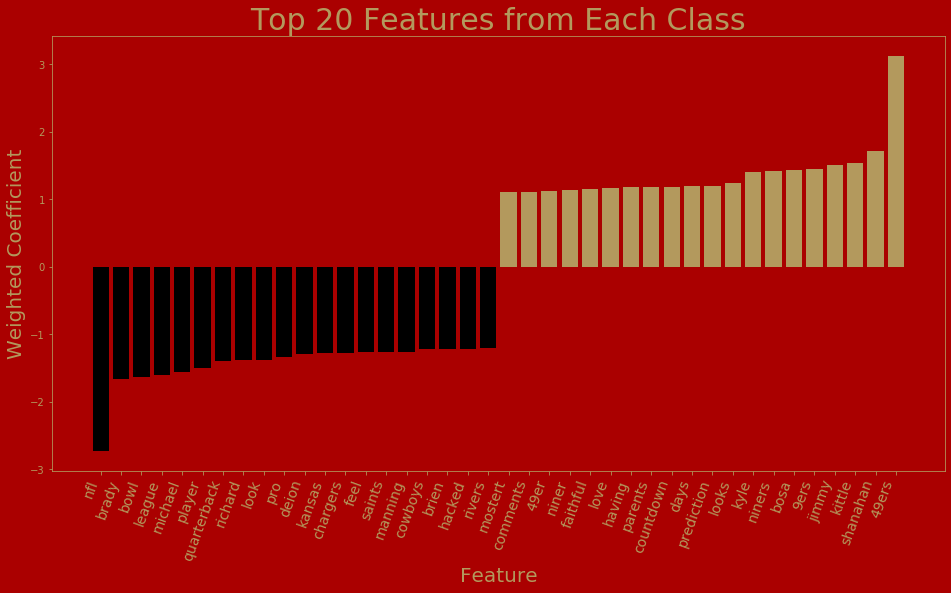

In [26]:
plot_coefficients(svc, tfidf.get_feature_names())

In [17]:
def total_metrics(insta_model,X_test, y_test):
    accuracy = accuracy_score(y_test, y_pred_class)
    test_raw = tfidf.transform(X_test)

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn+fp)
    precision =  tp / (tp + fp)
    bas = balanced_accuracy_score(y_test,y_pred_class)
    
    print("\u0332".join("RESULTS OF TFIDFVECTORIZER / SUPPORT VECTOR MACHINES MODEL "))
    print('')
    print(f"          Accuracy: {round(accuracy,3)}")
    print('')
    print(f" Balance Accuracy: {round(bas,3)}")
    print('')
    print(f"       Sensitivity: {round(sensitivity,3)}")
    print('')
    print(f"       Specificity: {round(specificity,3)}")
    print('')
    print(f"         Precision: {round(precision,3)}")
    print('') 

In [18]:
total_metrics(svc,X_test,y_test)

R̲E̲S̲U̲L̲T̲S̲ ̲O̲F̲ ̲T̲F̲I̲D̲F̲V̲E̲C̲T̲O̲R̲I̲Z̲E̲R̲ ̲/̲ ̲S̲U̲P̲P̲O̲R̲T̲ ̲V̲E̲C̲T̲O̲R̲ ̲M̲A̲C̲H̲I̲N̲E̲S̲ ̲M̲O̲D̲E̲L̲ 

          Accuracy: 0.788

 Balance Accuracy: 0.788

       Sensitivity: 0.769

       Specificity: 0.806

         Precision: 0.801



In [19]:
svm_gs.score(X_train,y_train)

0.9157754010695187

In [20]:
svm_gs.score(X_test,y_test)

0.7875751503006012